# Challenge: Factors that affect life expectancy


* Find the factors that affect the life expectancy.
* Find out which factors increase the expected life in the countries and which factors decrease it.

# 1. Loading the dataset:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from scipy.stats import boxcox
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

WHO_WB_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
#Displaying a preview of the data

WHO_WB_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Displaying all the unique values to see any issues

for column_name in WHO_WB_df.columns:
    print("Unique values in column {} are: {}".format(column_name, WHO_WB_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [4]:
# Displaying what type of variables are in the dataset

WHO_WB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

# 2. Detecting problems with the data:

In [5]:
# Converting column vales into floats to see if their are any issues with any variables

for column_name in ["Life expectancy ","Adult Mortality","infant deaths","Alcohol","percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio","Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]:
    print('These are the problematic values in the variable {}'.format(column_name))
    for value in WHO_WB_df[column_name]:
        try:
            float(value)
        except:
            print(value)
        

These are the problematic values in the variable Life expectancy 
These are the problematic values in the variable Adult Mortality
These are the problematic values in the variable infant deaths
These are the problematic values in the variable Alcohol
These are the problematic values in the variable percentage expenditure
These are the problematic values in the variable Hepatitis B
These are the problematic values in the variable Measles 
These are the problematic values in the variable  BMI 
These are the problematic values in the variable under-five deaths 
These are the problematic values in the variable Polio
These are the problematic values in the variable Total expenditure
These are the problematic values in the variable Diphtheria 
These are the problematic values in the variable  HIV/AIDS
These are the problematic values in the variable GDP
These are the problematic values in the variable Population
These are the problematic values in the variable  thinness  1-19 years
These are

In [6]:
# Looking into the dataframe to see if there are any variables that are empty; let's see if there is a better way to solve 
#for this...

WHO_WB_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Counting the percentage of variables that are null

WHO_WB_df.isnull().sum()*100/WHO_WB_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [8]:
#checking the frequencies for all the categorical values

WHO_WB_df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [9]:
#checking the frequencies for all the categorical values

WHO_WB_df.Country.value_counts()

South Africa                             16
Malaysia                                 16
Lesotho                                  16
Lebanon                                  16
Tajikistan                               16
Brazil                                   16
Djibouti                                 16
Swaziland                                16
Myanmar                                  16
Nicaragua                                16
Cameroon                                 16
Venezuela (Bolivarian Republic of)       16
Ireland                                  16
Comoros                                  16
Luxembourg                               16
Liberia                                  16
Uganda                                   16
Lao People's Democratic Republic         16
Papua New Guinea                         16
South Sudan                              16
Bangladesh                               16
Italy                                    16
Georgia                         

In [10]:
#Replacing the values with the mean of each column to solve for missing values

WHO_WB_df["Life expectancy "].fillna(WHO_WB_df["Life expectancy "].mean(), inplace=True)
WHO_WB_df["Adult Mortality"].fillna(WHO_WB_df["Adult Mortality"].mean(), inplace=True)
WHO_WB_df["Alcohol"].fillna(WHO_WB_df["Alcohol"].mean(), inplace=True)
WHO_WB_df["Hepatitis B"].fillna(WHO_WB_df["Hepatitis B"].mean(), inplace=True)
WHO_WB_df["Polio"].fillna(WHO_WB_df["Polio"].mean(), inplace=True)
WHO_WB_df["Total expenditure"].fillna(WHO_WB_df["Total expenditure"].mean(), inplace=True)
WHO_WB_df["Diphtheria "].fillna(WHO_WB_df["Diphtheria "].mean(), inplace=True)
WHO_WB_df["GDP"].fillna(WHO_WB_df["GDP"].mean(), inplace=True)
WHO_WB_df["Population"].fillna(WHO_WB_df["Population"].mean(), inplace=True)
WHO_WB_df[" thinness  1-19 years"].fillna(WHO_WB_df[" thinness  1-19 years"].mean(), inplace=True)
WHO_WB_df[" thinness 5-9 years"].fillna(WHO_WB_df[" thinness 5-9 years"].mean(), inplace=True)
WHO_WB_df["Income composition of resources"].fillna(WHO_WB_df["Income composition of resources"].mean(), inplace=True)
WHO_WB_df["Schooling"].fillna(WHO_WB_df["Schooling"].mean(), inplace=True)
WHO_WB_df[" BMI "].fillna(WHO_WB_df[" BMI "].mean(), inplace=True)

In [11]:
#counting the percentage of variables that have 0's for values

WHO_WB_df.isnull().sum()*100/WHO_WB_df.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [12]:
#looking at statistical information in our variables

WHO_WB_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [13]:
#converting some variables to have boxcox output

WHO_Adult_Mortality_boxcox,_ = boxcox(WHO_WB_df["Adult Mortality"])

WHO_Diphtheria_boxcox,_ = boxcox(WHO_WB_df["Diphtheria "])

HepB_boxcox,_ = boxcox(WHO_WB_df["Hepatitis B"])

WHO_WB_df["Income composition of resources"].replace([np.inf, -np.inf],np.nan)
WHO_WB_df["Income composition of resources"].fillna(WHO_WB_df["Income composition of resources"].mean(), inplace=True)
WHO_WB_df["Income composition of resources"].replace(0,WHO_WB_df["Income composition of resources"].mean(), inplace=True)


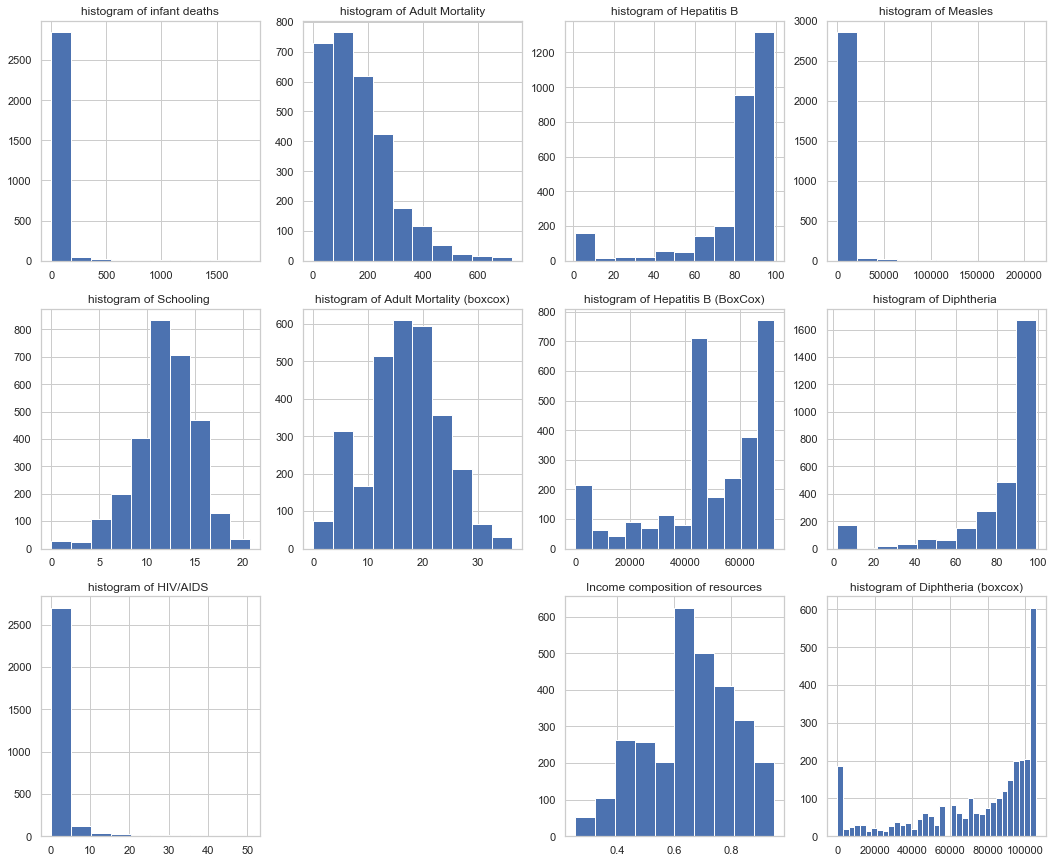

In [14]:
plt.figure(figsize=(18,15))

plt.subplot(3,4,1)
plt.hist(WHO_WB_df["infant deaths"])
plt.title('histogram of infant deaths')

plt.subplot(3,4,2)
plt.hist(WHO_WB_df["Adult Mortality"])
plt.title( "histogram of Adult Mortality" )

plt.subplot(3,4,3)
plt.hist(WHO_WB_df["Hepatitis B"])
plt.title('histogram of Hepatitis B')

plt.subplot(3,4,4)
plt.hist(WHO_WB_df["Measles "])
plt.title('histogram of Measles')

plt.subplot(3,4,8)
plt.hist(WHO_WB_df["Diphtheria "])
plt.title('histogram of Diphtheria ')

plt.subplot(3,4,5)
plt.hist(WHO_WB_df["Schooling"])
plt.title('histogram of Schooling ')

plt.subplot(3,4,6)
plt.hist(WHO_Adult_Mortality_boxcox)
plt.title('histogram of Adult Mortality (boxcox)')

plt.subplot(3,4,7)
plt.hist(HepB_boxcox,bins = 12)
plt.title("histogram of Hepatitis B (BoxCox)")

plt.subplot(3,4,9)
plt.hist(WHO_WB_df[" HIV/AIDS"])
plt.title('histogram of HIV/AIDS ')

plt.subplot(3,4,12)
plt.hist(WHO_Diphtheria_boxcox,bins=35)
plt.title('histogram of Diphtheria (boxcox)')

plt.subplot(3,4,11)
plt.hist(WHO_WB_df["Income composition of resources"])
plt.title("Income composition of resources")



plt.show()

In [15]:
#performing Jarque-bera and normal test to see the significance of the histograms

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_adultMor_stats = jarque_bera(WHO_Adult_Mortality_boxcox)
norm_adultMor_stats = normaltest(WHO_Adult_Mortality_boxcox)

print("Jarque Bera test statistics is {0} and the p value is {1}".format(jb_adultMor_stats[0],jb_adultMor_stats[1]))
print("Normality test statistics is {0} and the p value is {1}".format(norm_adultMor_stats[0],norm_adultMor_stats[1]))


jb_schooling_stats = jarque_bera(WHO_WB_df["Schooling"])
norm_schooling_stats = normaltest(WHO_WB_df["Schooling"])

print("")
print("Jarque Bera test statistics is {0} and the p value is {1}".format(jb_schooling_stats[0],jb_schooling_stats[1]))
print("Normality test statistics is {0} and the p value is {1}".format(norm_schooling_stats[0],norm_schooling_stats[1]))



jb_HIV_stats = jarque_bera(WHO_WB_df[" HIV/AIDS"])
norm_HIV_stats = normaltest(WHO_WB_df[" HIV/AIDS"])
print("")
print("Jarque Bera test statistics is {0} and the p value is {1}".format(jb_HIV_stats[0],jb_HIV_stats[1]))
print("Normality test statistics is {0} and the p value is {1}".format(norm_HIV_stats[0],norm_HIV_stats[1]))



jb_Income_stats = jarque_bera(WHO_WB_df["Income composition of resources"])
norm_Income_stats = normaltest(WHO_WB_df["Income composition of resources"])
print("")
print("Jarque Bera test statistics is {0} and the p value is {1}".format(jb_Income_stats[0],jb_Income_stats[1]))
print("Normality test statistics is {0} and the p value is {1}".format(norm_Income_stats[0],norm_Income_stats[1]))


Jarque Bera test statistics is 15.138904699409734 and the p value is 0.0005159749450817097
Normality test statistics is 19.523019261362066 and the p value is 5.762756010318256e-05

Jarque Bera test statistics is 338.8994006338934 and the p value is 0.0
Normality test statistics is 228.43249300823985 and the p value is 2.491806988760584e-50

Jarque Bera test statistics is 162756.00200782967 and the p value is 0.0
Normality test statistics is 3100.2891653944325 and the p value is 0.0

Jarque Bera test statistics is 97.79860602565395 and the p value is 0.0
Normality test statistics is 153.34781548852285 and the p value is 5.022789303473837e-34


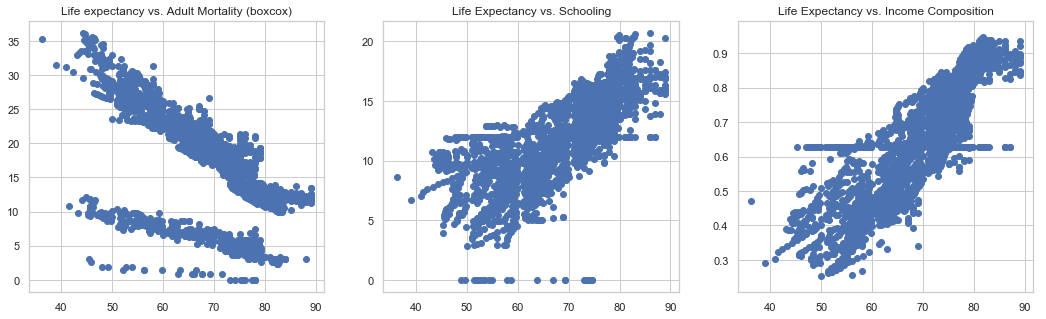

In [16]:
#plotting scatterplots to for bivariate analysis

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(WHO_WB_df["Life expectancy "],WHO_Adult_Mortality_boxcox)
plt.title("Life expectancy vs. Adult Mortality (boxcox)")


plt.subplot(1,3,2)
plt.scatter(WHO_WB_df["Life expectancy "],WHO_WB_df["Schooling"])
plt.title('Life Expectancy vs. Schooling')

plt.subplot(1,3,3)
plt.scatter(WHO_WB_df["Life expectancy "],WHO_WB_df["Income composition of resources"])
plt.title('Life Expectancy vs. Income Composition')


plt.show()

It is clear to see that Adulit Mortality has an inverse relationship with Life Expectancy. If adult mortality is low in the country then life expectancy becomes higher. Schooling and Income Composition have a positive relationship with Life Expectancy.

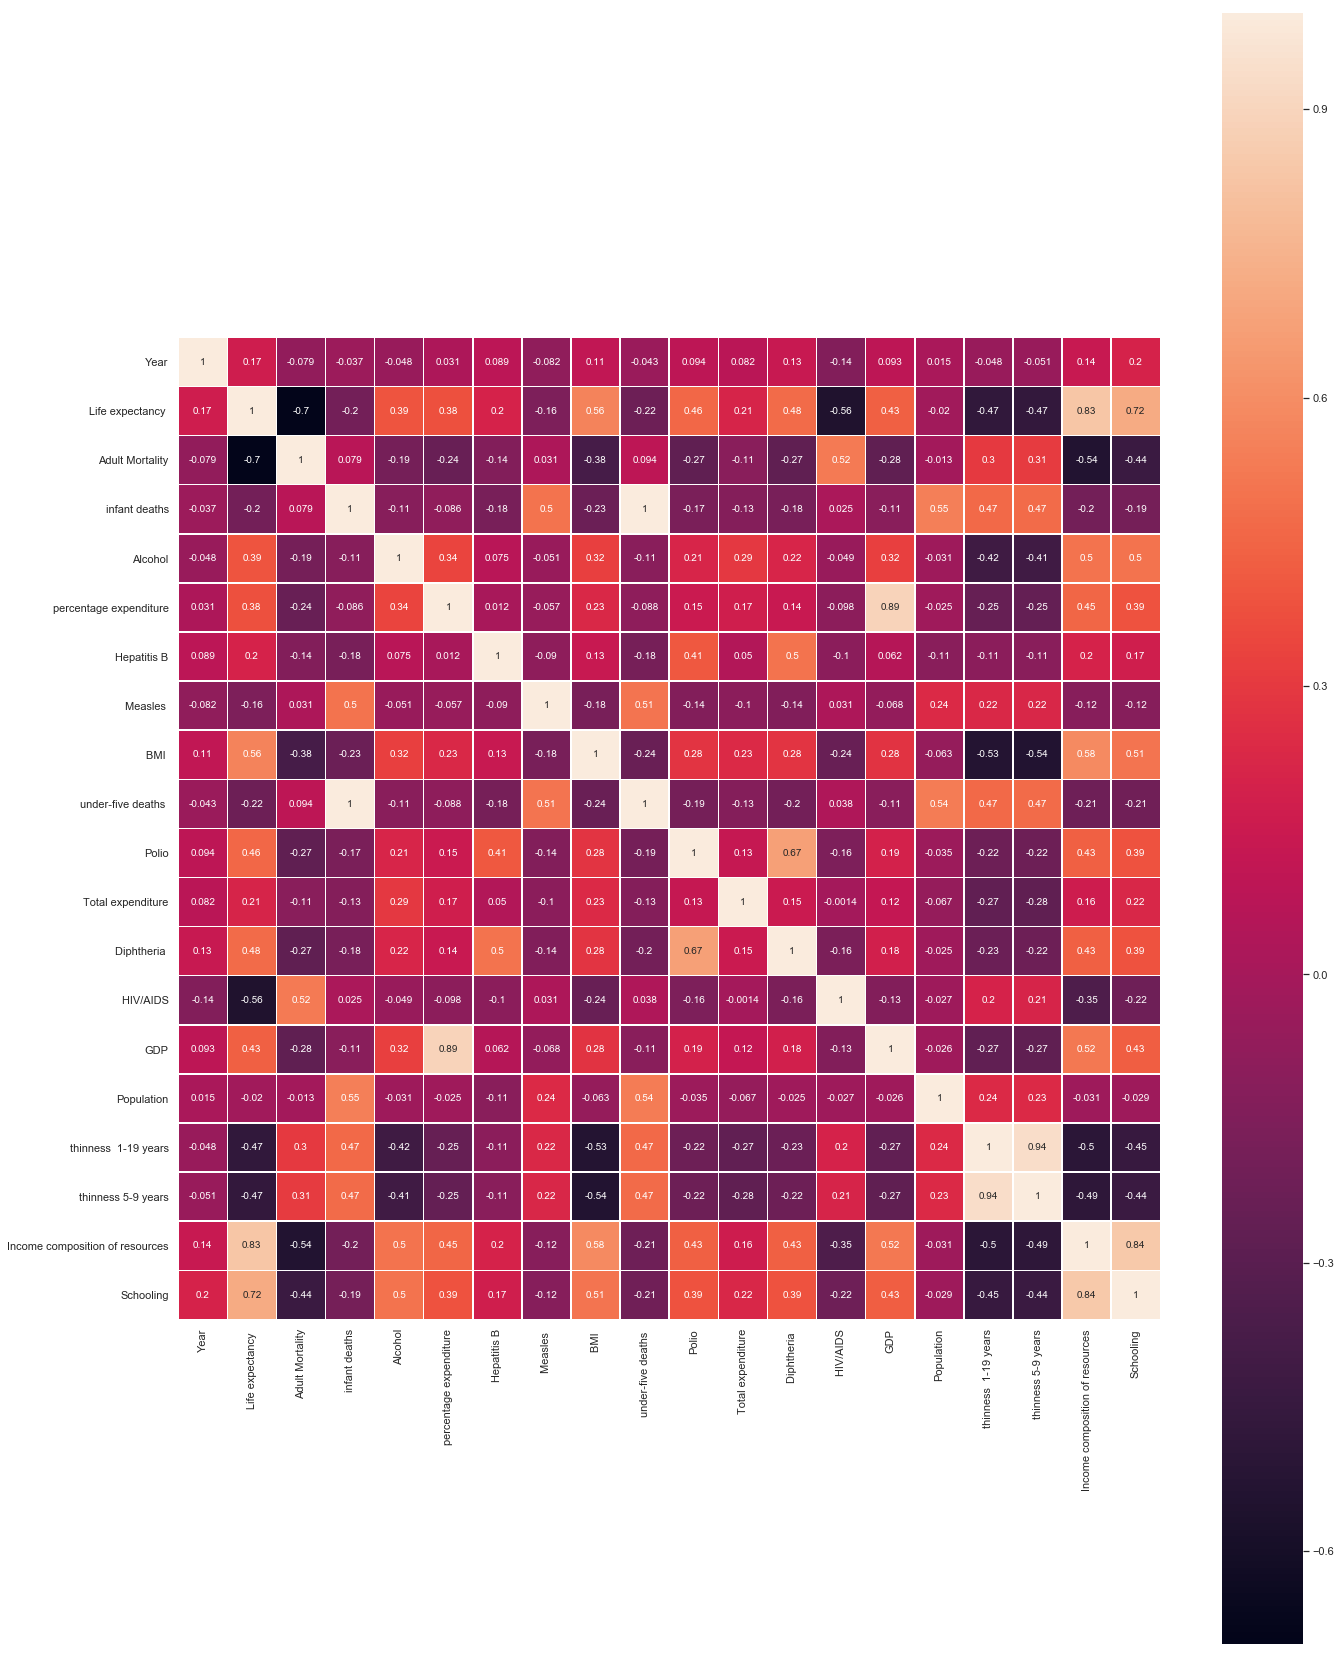

In [17]:
#Creating heatmap of correlations

corrmat_life = WHO_WB_df.corr()

plt.figure(figsize=(22,30))

sns.heatmap(corrmat_life, square=True, annot=True, linewidths=.55)
plt.title=('correlation matrix (Life expectancy)')

plt.show()

In [18]:
#WHO_WB_df["Income composition of resources"].describe

In [19]:
#WHO_WB_df["Income composition of resources"].replace([np.inf, -np.inf],np.nan)

In [20]:
# WHO_WB_df["Income composition of resources"].fillna(WHO_WB_df["Income composition of resources"].mean(), inplace=True)

In [21]:
# plt.hist(WHO_WB_df["Income composition of resources"],limits=[0.8])
# plt.title("Income composition of resources")

In [22]:
#who_infant_df = pd.DataFrame(WHO_WB_df["infant deaths"])

In [23]:
#who_infant_df.replace(0,WHO_WB_df["infant deaths"].mean(), inplace=True)

In [24]:
#who_infant_df

In [25]:
# plt.figure(figsize=(20,4))

# plt.hist(who_infant_df["infant deaths"])
# plt.show()

In [26]:
#WHO_WB_df["winsorized_HIV/AIDS"] = winsorize(WHO_WB_df[" HIV/AIDS"],(0,0.3))

#WHO_WB_df["winsorized_HIV/AIDS_2"] = winsorize(WHO_WB_df[" HIV/AIDS"], limits=[0.1, 0.9])

#plt.figure(figsize=(18,10))

#plt.subplot(1,2,1)
#plt.hist(WHO_WB_df["winsorized_HIV/AIDS"])
#plt.title('histogram of HIV/AIDS (winsorized (0,0.3)')

# plt.subplot(1,2,2)
# plt.hist(WHO_WB_df["winsorized_HIV/AIDS_2"],bins=30)
# plt.title('histogram of HIV/AIDS (winsorized (0.5)')






In [27]:
#WHO_WB_df["winsorized_HIV/AIDS_2"].value_counts()

In [28]:
# WHO_WB_df["winsorized_HIV/AIDS"] = winsorize(WHO_WB_df[" HIV/AIDS"],(0,0.3))
# WHO_WB_df["winsorized_HIV/AIDS_2"] = winsorize(WHO_WB_df[" HIV/AIDS"], (0,0.05))


#BoxCox Transformation
# HIV_boxcox,_ = boxcox(WHO_WB_df[" HIV/AIDS"])

# plt.figure(figsize=(20,10))

# plt.subplot(2,2,1)
# plt.hist(WHO_WB_df[" HIV/AIDS"])
# plt.title('histogram of HIV/AIDS')

# plt.subplot(2,2,2)
# plt.hist(WHO_WB_df["winsorized_HIV/AIDS"])
# plt.title('histogram of HIV/AIDS (winsorized (0,0.3)')

# plt.subplot(2,2,3)
# plt.hist(WHO_WB_df["winsorized_HIV/AIDS_2"])
# plt.title('histogram of HIV/AIDS (winsorized (0,0.05)')

#plt.subplot(2,2,3)
#plt.hist(who_infant_df["infant d])
#plt.title('histogram of infant death (log)')

# plt.subplot(2,2,4)
# plt.hist(HIV_boxcox)
# plt.title('histogram of HIV/AIDS (BoxCox)')

# plt.show()





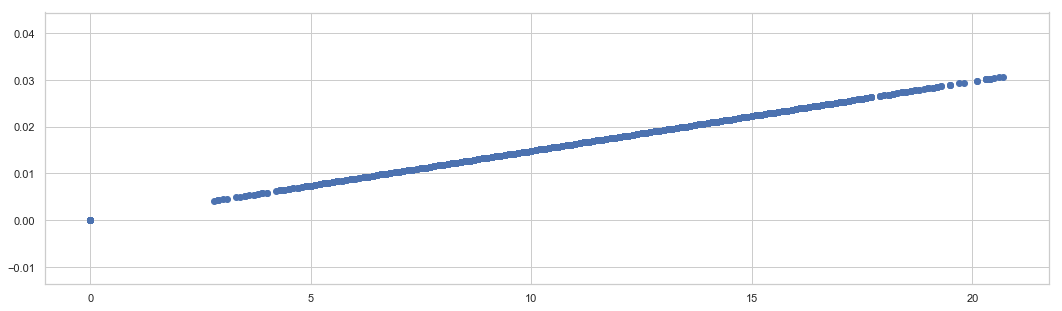

In [29]:
#normalizing variables for easier use of modeling later on
from sklearn.preprocessing import normalize


plt.figure(figsize=(18,5))
WHO_WB_df["norm_Schooling"] = normalize(np.array(WHO_WB_df["Schooling"]).reshape(1,-1)).reshape(-1,1)
plt.scatter(WHO_WB_df["Schooling"], WHO_WB_df["norm_Schooling"])
#plt.title('normalized data for schooling')

plt.show()

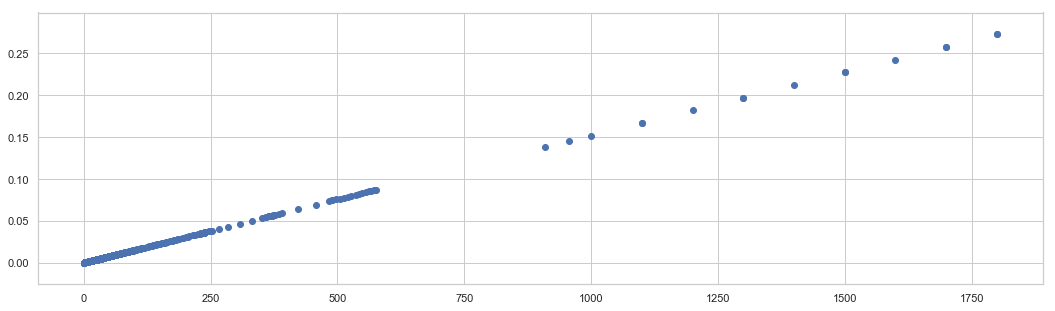

In [36]:
#normalizing variables for easier use of modeling later on
from sklearn.preprocessing import normalize


plt.figure(figsize=(18,5))
WHO_WB_df["norm_infant deaths"] = normalize(np.array(WHO_WB_df["infant deaths"]).reshape(1,-1)).reshape(-1,1)
plt.scatter(WHO_WB_df["infant deaths"],WHO_WB_df["norm_infant deaths"])
#plt.title('normalized data for infant deaths')
plt.show()

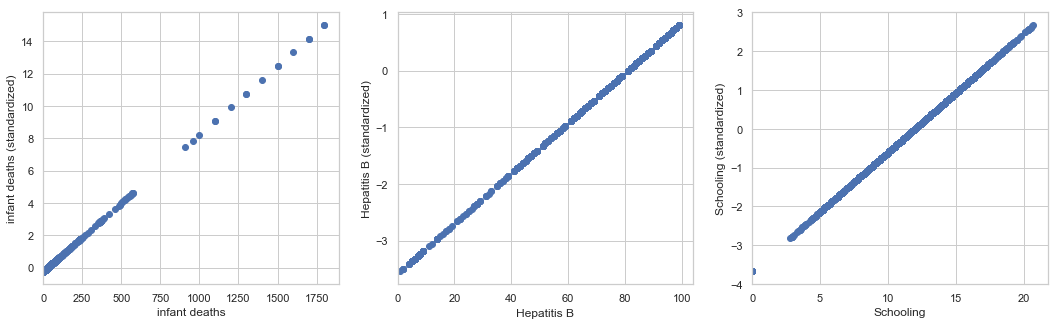

In [31]:
#STANDARDIZE the data
from sklearn.preprocessing import scale


plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
WHO_WB_df["scaled_infant_deaths"] = scale(WHO_WB_df["infant deaths"])
plt.scatter(WHO_WB_df["infant deaths"],WHO_WB_df["scaled_infant_deaths"])
plt.xlabel("infant deaths")
plt.ylabel("infant deaths (standardized)")
plt.xlim(0.00000001)

plt.subplot(1,3,2)
WHO_WB_df["scaled_Hepatitis B"] = scale(WHO_WB_df["Hepatitis B"])
plt.scatter(WHO_WB_df["Hepatitis B"],WHO_WB_df["scaled_Hepatitis B"])
plt.xlabel("Hepatitis B")
plt.ylabel("Hepatitis B (standardized)")
plt.xlim(0.00000001)


plt.subplot(1,3,3)
WHO_WB_df["scaled_Schooling"] = scale(WHO_WB_df["Schooling"])
plt.scatter(WHO_WB_df["Schooling"],WHO_WB_df["scaled_Schooling"])
plt.xlabel("Schooling")
plt.ylabel("Schooling (standardized)")
plt.xlim(0.00000001)


plt.show()


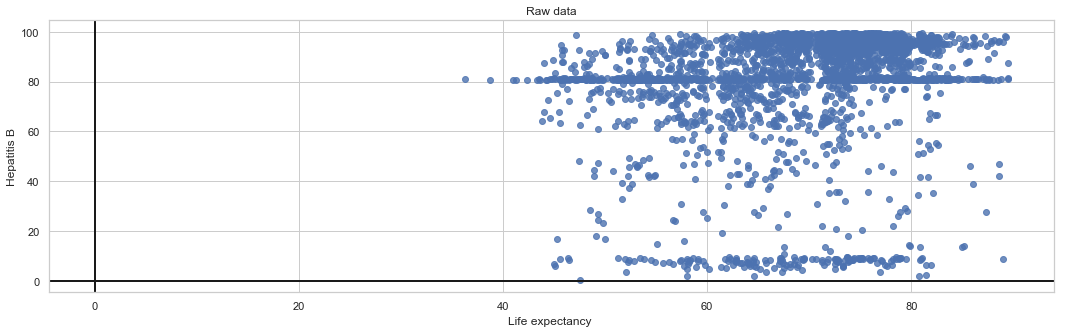

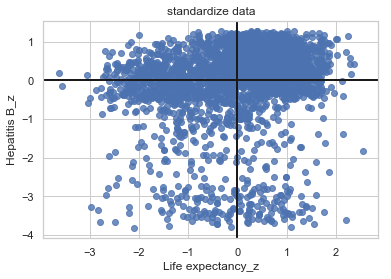

In [32]:
plt.figure(figsize=(18,5))

t = sns.regplot("Life expectancy ","Hepatitis B", WHO_WB_df, x_jitter=.49, y_jitter=.49, fit_reg=False)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()


WHO_st_WB_df = pd.DataFrame()
WHO_st_WB_df['Life expectancy_z'] = (WHO_WB_df["Life expectancy "] - WHO_WB_df["Life expectancy "].mean()) / WHO_WB_df["Life expectancy "].std()
WHO_st_WB_df['Hepatitis B_z'] = (WHO_WB_df["Hepatitis B"] - WHO_WB_df["Hepatitis B"].mean()) / WHO_WB_df["Hepatitis B"].std()

t = sns.regplot('Life expectancy_z','Hepatitis B_z', WHO_st_WB_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('standardize data')
plt.show()



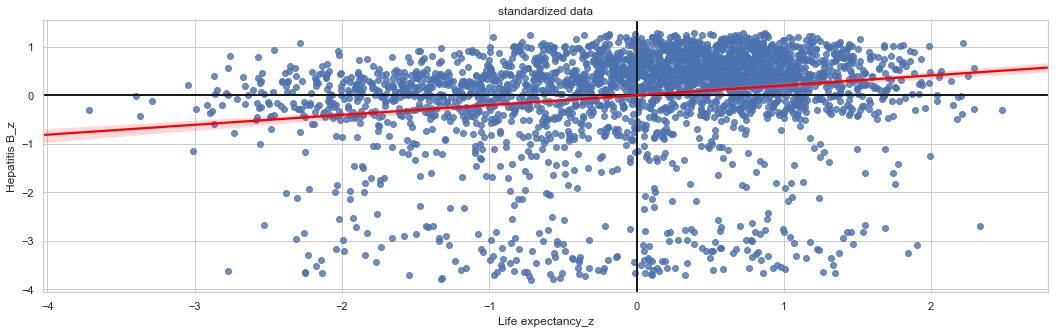

In [33]:
plt.figure(figsize=(18,5))

t = sns.regplot('Life expectancy_z','Hepatitis B_z', WHO_st_WB_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0,color='k',linestyle='-',linewidth=2)
t.axvline(0,color='k',linestyle='-',linewidth=2)
t.axes.set_title('standardized data')

sns.regplot('Life expectancy_z','Hepatitis B_z', WHO_st_WB_df, scatter=False, color='red')
plt.show()


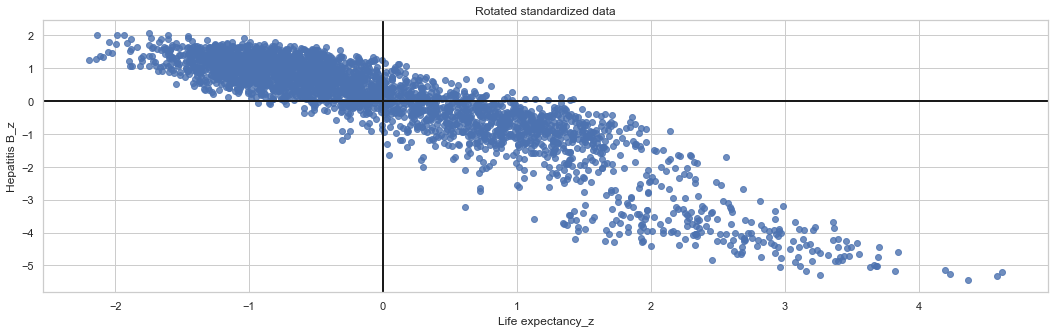

In [34]:
#ROTATING
import math

plt.figure(figsize=(18,5))

WHO_st_WB_df['Life expectancy_z'] = math.cos(40) * WHO_st_WB_df['Life expectancy_z'] - math.sin(40) * WHO_st_WB_df['Hepatitis B_z']
WHO_st_WB_df['Hepatitis B_z'] = math.sin(40) * WHO_st_WB_df['Hepatitis B_z'] + math.cos(40) * WHO_st_WB_df['Life expectancy_z']

t = sns.regplot('Life expectancy_z', 'Hepatitis B_z', WHO_st_WB_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0,color='k',linestyle='-',linewidth=2)
t.axvline(0,color='k',linestyle='-',linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

#normalize the data so all varialbles have a mean of 0 and Standard deviation of 1

X = WHO_WB_df

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


Covariance Matrix:
 10.656185173937983
